In [4]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import math 
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)

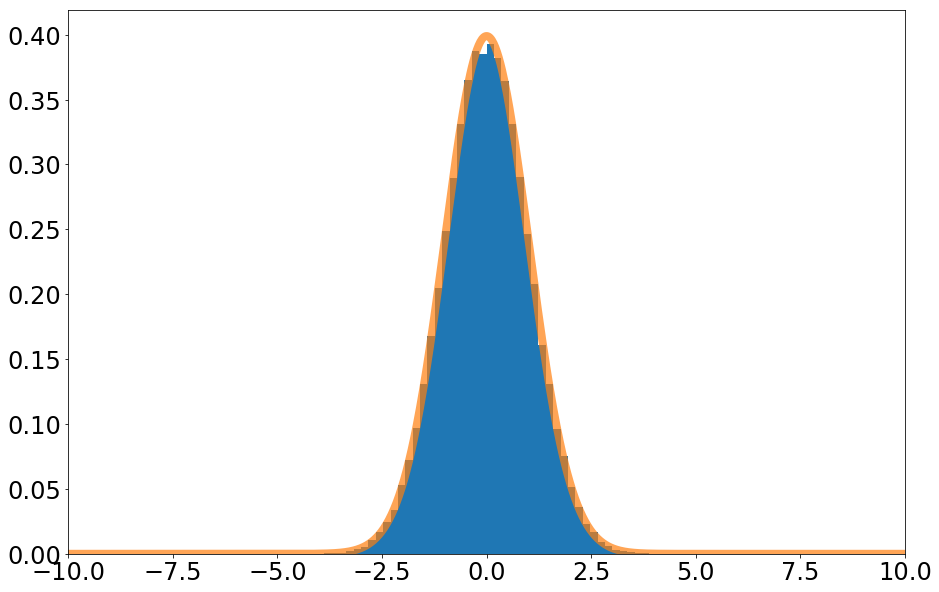

In [5]:
d = stats.norm.rvs(loc = 0, scale = 1, size = 100000)
fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([-10, 10])
x = np.linspace(-10, 10, 1000)
ax.plot(x,stats.norm.pdf(x,loc = 0, scale = 1),linewidth = 8,alpha = 0.7)
plt.show()

In [6]:
z = [0, 0.5, 1, 1.5, 2, 5]
for x in z:
    print(stats.norm.cdf(x, 0 , 1) - 0.5)

0.0
0.19146246127401312
0.3413447460685429
0.4331927987311419
0.4772498680518208
0.4999997133484281


In [7]:
z = [0, 0.5, 1, 1.5, 2, 5]
for x in z:
    print(stats.norm.ppf(stats.norm.cdf(x, 0 , 1)))


0.0
0.5000000000000001
1.0
1.4999999999999996
2.0000000000000004
4.999999999970176


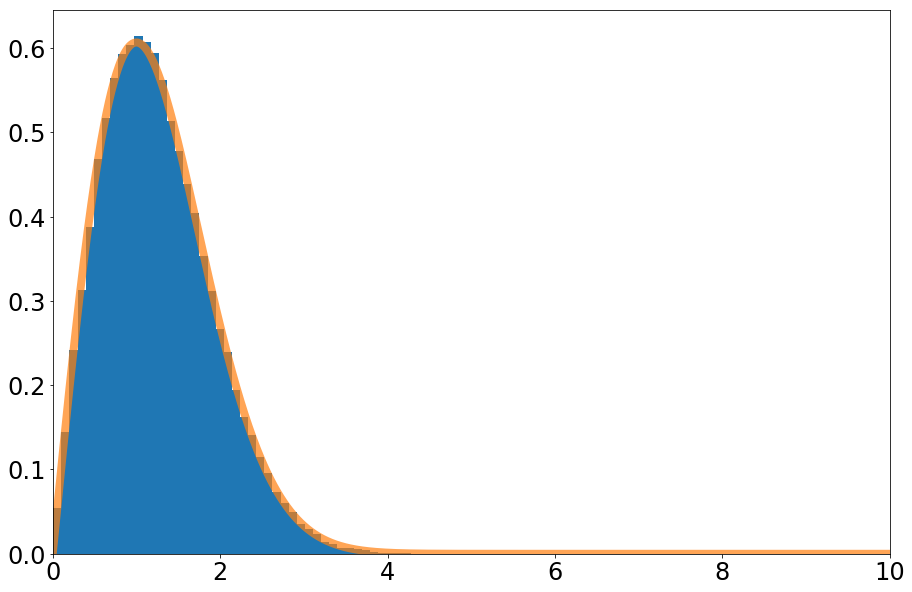

In [34]:
sample = stats.rayleigh.rvs(loc = 0, scale = 1, size = 100000)
fig, ax = plt.subplots(1, 1)
ax.hist(sample,50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([0, 10])
x = np.linspace(0, 10, 1000)
ax.plot(x,stats.rayleigh.pdf(x,loc = 0, scale = 1),linewidth = 8,alpha = 0.7)
plt.show()

In [12]:
#choosing observed = 5
#probability of observed:
obs_prob = 1 - stats.rayleigh.cdf(5, 0 , 1)
print('Probability of observed value is ' + str(obs_prob))
#convert probability to sigma:
sigma = stats.norm.ppf(obs_prob, 0, 1)
print('Sigma of observed probability is ' + str(sigma))
stats.norm.ppf(obs_prob, 0, 1)

Probability of observed value is 3.7266531720536733e-06
Sigma of observed probability is -4.4803146987717914


-4.4803146987717914

TypeError: _parse_args() got an unexpected keyword argument 'moments'

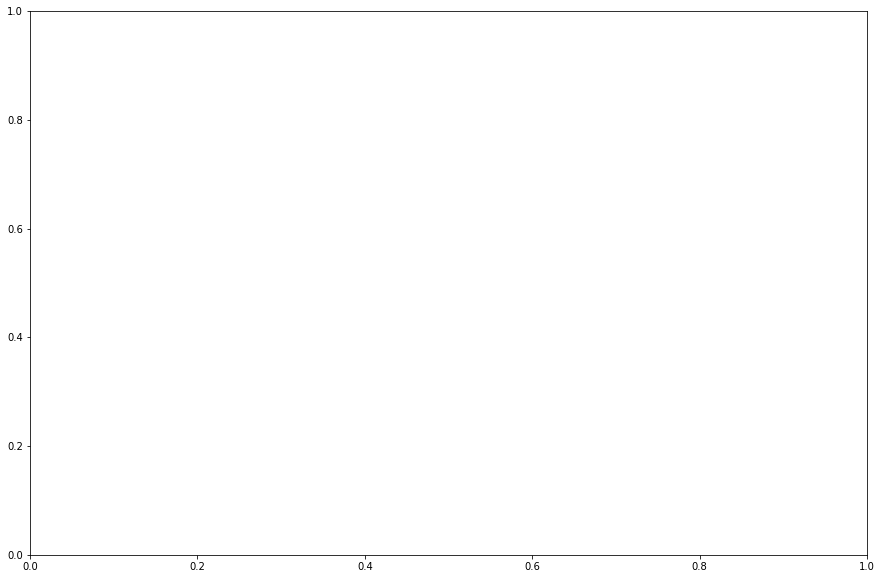

In [23]:
fig, ax = plt.subplots(1, 1)
n, p = 5, 0.4
mean, var, skew, kurt = stats.binom(n, p, moments='mvsk')
x = np.arange(stats.binom.ppf(0.01, n, p), stats.binom.ppf(0.99, n, p))
ax.plot(x, stats.binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, stats.binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
plt.tick_params(labelsize = 24)
rv = stats.binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

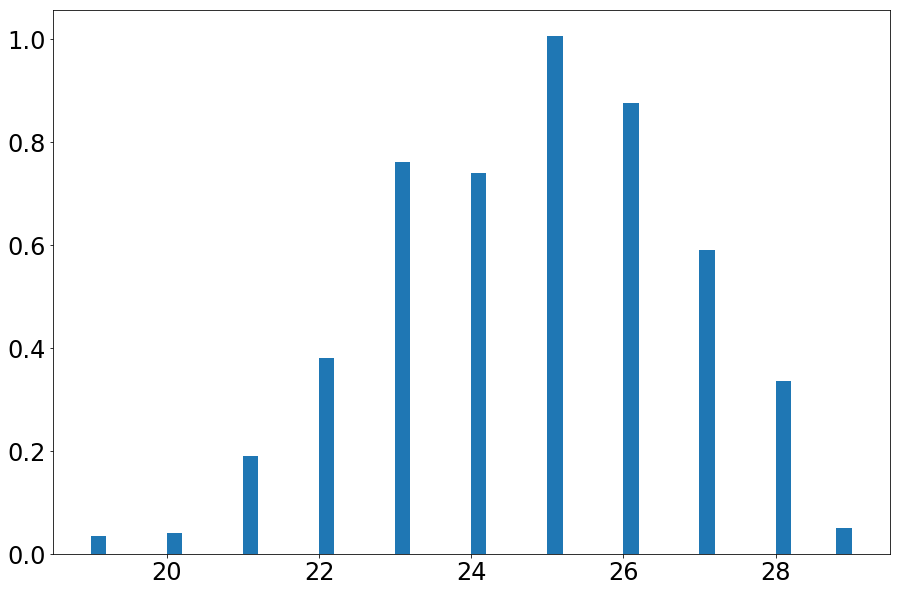

In [42]:
sample = stats.binom.rvs(n=29, p=0.85, loc=0, size=1000)
fig, ax = plt.subplots(1, 1)
ax.hist(sample,50, density=True)
plt.tick_params(labelsize = 24)

x = np.linspace(0, 10, 1000)
plt.step()
plt.show()

In [38]:
stats.binom.rvs(n=29, p=0.85, loc=0, size=1000)

array([23, 21, 23, 25, 26, 25, 26, 22, 26, 23, 24, 22, 29, 27, 26, 23, 28,
       23, 26, 25, 25, 19, 19, 24, 22, 23, 25, 20, 26, 25, 24, 23, 26, 25,
       26, 21, 25, 27, 28, 23, 27, 25, 24, 25, 25, 22, 25, 23, 23, 25, 27,
       25, 28, 25, 26, 22, 22, 22, 22, 25, 26, 22, 25, 23, 22, 26, 25, 26,
       25, 28, 24, 24, 22, 24, 23, 28, 24, 26, 26, 25, 25, 26, 24, 23, 27,
       28, 23, 26, 29, 25, 26, 24, 23, 23, 27, 22, 24, 24, 26, 25, 23, 28,
       26, 28, 24, 21, 24, 23, 24, 24, 26, 24, 25, 23, 19, 26, 26, 26, 27,
       28, 23, 26, 23, 23, 26, 25, 27, 25, 23, 24, 25, 26, 27, 19, 27, 25,
       23, 23, 27, 24, 24, 27, 24, 21, 22, 24, 25, 23, 20, 24, 24, 26, 26,
       26, 21, 21, 27, 26, 23, 23, 23, 25, 25, 25, 25, 22, 27, 22, 23, 22,
       24, 26, 26, 24, 23, 27, 22, 26, 26, 26, 24, 25, 26, 23, 24, 26, 25,
       27, 23, 26, 21, 22, 28, 23, 24, 26, 28, 24, 26, 25, 24, 23, 27, 25,
       27, 23, 24, 26, 23, 23, 27, 24, 24, 27, 25, 23, 22, 26, 25, 23, 26,
       25, 27, 22, 25, 28